### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [195]:
import pandas as pd

In [196]:
data = pd.read_csv('data.csv', delimiter=',')
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


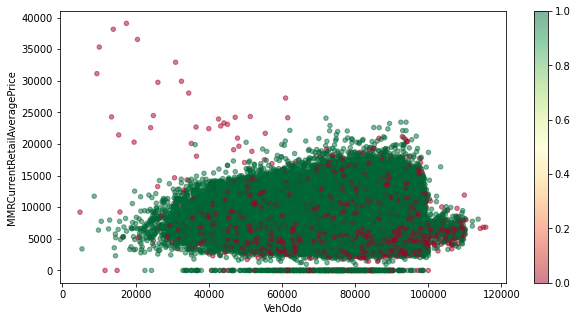

In [198]:
fig, axes = plt.subplots(figsize= [10,5])
data.plot(x='VehOdo',y='MMRCurrentRetailAveragePrice',kind='scatter',color=(data['IsBadBuy']-1)*(-1),cmap= 'RdYlGn',alpha = 0.5 ,ax=axes)

plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [199]:
from sklearn import *
import numpy as np
i = data['MMRCurrentRetailAveragePrice'].notnull()
x1 = data.loc[i, 'VehOdo'].values
x2 = data.loc[i, 'MMRCurrentRetailAveragePrice'].values
#X = [[data.loc[i, 'VehOdo'], data.loc[i, 'MMRCurrentRetailAveragePrice']]]
x1 = np.reshape(x1,(-1, 1))
x2 = np.reshape(x2,(-1, 1))
X = np.hstack((x1,x2))
y = data.loc[i,'IsBadBuy'].values
X  

array([[89046., 11597.],
       [93593., 11374.],
       [73807.,  7146.],
       ...,
       [88500., 11831.],
       [79554., 10099.],
       [66855., 11954.]])

In [200]:
model1 = linear_model.LinearRegression()
model1.fit(X, y)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [201]:
prediction = model1.predict(X)
prediction

array([0.12473569, 0.13585101, 0.14563746, ..., 0.12108278, 0.12349799,
       0.07867021])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [202]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]
predictionClass

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [203]:
print(metrics.classification_report(y, predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63724
           1       0.00      0.00      0.00      8944

    accuracy                           0.88     72668
   macro avg       0.44      0.50      0.47     72668
weighted avg       0.77      0.88      0.82     72668



C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [204]:
print(metrics.confusion_matrix(y, predictionClass))

[[63724     0]
 [ 8944     0]]


In [205]:
predictionClass = [1 if prediction[i] > 0.2 else 0 for i in range(prediction.shape[0])]


In [206]:
print(metrics.classification_report(y, predictionClass))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     63724
           1       0.26      0.09      0.13      8944

    accuracy                           0.86     72668
   macro avg       0.57      0.53      0.53     72668
weighted avg       0.81      0.86      0.82     72668



In [207]:
print(metrics.confusion_matrix(y, predictionClass))

[[61528  2196]
 [ 8166   778]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [208]:
model=tree.DecisionTreeClassifier(max_depth=20)

model.fit(X,y)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [209]:
prediction_tree = model.predict_proba(X)
prediction_tree

array([[0.89317804, 0.10682196],
       [1.        , 0.        ],
       [0.85810056, 0.14189944],
       ...,
       [0.89317804, 0.10682196],
       [0.86746988, 0.13253012],
       [0.93789474, 0.06210526]])

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [210]:

predictionClass2 = [1 if prediction_tree[i][0] < 0.5 else 0 for i in range(y.shape[0])]
predictionClass2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [211]:
print(metrics.classification_report(y, predictionClass2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.97      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668



In [212]:
print(metrics.confusion_matrix(y, predictionClass2))

[[63624   100]
 [ 6185  2759]]


In [213]:
# Метод решающего дерева оказался лучше, за счет лучшего предсказания результатов

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [214]:
dataTrain = y[slice(0,34999)]
dataTest = y[slice(35000,69999)]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [216]:
xTrain = x1[slice(0,34999)]
xTest = x1[slice(35000,69999)]
tree20=tree.DecisionTreeClassifier(max_depth=20)
tree20.fit(xTrain,dataTrain)
prediction_tree = tree20.predict_proba(xTrain)
predictionClass = [1 if prediction_tree[i][0] < 0.5 else 0 for i in range(34999)]
prediction_tree2 = tree20.predict_proba(xTest)
predictionClass2 = [1 if prediction_tree2[i][0] < 0.5 else 0 for i in range(34999)]
metrics.accuracy_score(dataTrain,predictionClass)

0.9003971542044058

In [217]:
metrics.accuracy_score(dataTest,predictionClass2)

0.8572530643732678

In [218]:
tree55=tree.DecisionTreeClassifier(max_depth=54)
tree55.fit(xTrain,dataTrain)
prediction_tree = tree55.predict_proba(xTrain)
predictionClass = [1 if prediction_tree[i][0] < 0.5 else 0 for i in range(34999)]
prediction_tree2 = tree55.predict_proba(xTest)
predictionClass2 = [1 if prediction_tree2[i][0] < 0.5 else 0 for i in range(34999)]
metrics.accuracy_score(dataTrain,predictionClass)

0.9477699362838938

In [219]:
metrics.accuracy_score(dataTest,predictionClass2)

0.812223206377325

In [220]:
tree15=tree.DecisionTreeClassifier(max_depth=15)
tree15.fit(xTrain,dataTrain)
prediction_tree = tree15.predict_proba(xTrain)
predictionClass = [1 if prediction_tree[i][0] < 0.5 else 0 for i in range(34999)]
prediction_tree2 = tree15.predict_proba(xTest)
predictionClass2 = [1 if prediction_tree2[i][0] < 0.5 else 0 for i in range(34999)]
metrics.accuracy_score(dataTrain,predictionClass)

0.8915111860338867

In [221]:
metrics.accuracy_score(dataTest,predictionClass2)

0.86442469784851

In [222]:
 #Для max_depth < 15 недообучена для max_depth > 55 переобучена, точка останова max_depth = 50

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [223]:
i = data['MMRCurrentRetailAveragePrice'].notnull()
x1 = data.loc[i, 'VehOdo'].values
x2 = data.loc[i, 'MMRCurrentRetailAveragePrice'].values
x1 = np.reshape(x1,(-1, 1))
x2 = np.reshape(x2,(-1, 1))
X = np.hstack((x1,x2))
y = data.loc[i,'IsBadBuy'].values

In [224]:

tree1=tree.DecisionTreeClassifier(max_depth=20)
tree1.fit(X,y)
prediction_tree = tree1.predict_proba(X)
predictionClass = [1 if prediction_tree[i][0] < 0.5 else 0 for i in range(y.shape[0])]
sum=0
for i in range(y.shape[0]):
    if predictionClass[i]!= y[i] and predictionClass[i]==0:
        sum+=100                                                                               
    elif predictionClass[i]!= y[i] and predictionClass[i]==1:
        sum+=1000
#sum/=y.shape[0]
sum

718800

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [194]:
predictionClass = [0 if prediction_tree[i][0] > 0.16 else 1 for i in range(y.shape[0])]
sum=0
for i in range(y.shape[0]):
    if predictionClass[i]!= y[i] and predictionClass[i]==0:
        sum+=100                                                                               
    elif predictionClass[i]!= y[i] and predictionClass[i]==1:
        sum+=1000
#sum/=y.shape[0]
sum

637100